<a href="https://colab.research.google.com/github/G-forcemole/Churn-EDA/blob/main/Churn_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Loading in the data

In [ ]:
df = pd.read_csv('CustomerChurn.csv')

Glance at the first five rows data frame.

In [ ]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


We have 7,043 rows and 21 columns to begin with.

In [ ]:
df.shape

(7043, 21)

All of the different column names inside an array.

In [ ]:
df.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

In [ ]:
df.dtypes

,0
customerID,object
gender,object
SeniorCitizen,int64
Partner,object
Dependents,object
tenure,int64
PhoneService,object
MultipleLines,object
InternetService,object
OnlineSecurity,object


Notice we only have 3 numerical attributes. These 3 will be evaluated in our summary statistics. Also, notice that 'TotalCharges' should be of the float type. There is also an issue with the 'SeniorCitizen' column, which only contains values {0,1}, for categorical purposes.

In [ ]:
df.drop(columns = "SeniorCitizen").describe()

,tenure,MonthlyCharges
count,7043.000000,7043.000000
mean,32.371149,64.761692
std,24.559481,30.090047
min,0.000000,18.250000
25%,9.000000,35.500000
50%,29.000000,70.350000
75%,55.000000,89.850000
max,72.000000,118.750000


We can see that 75% of customers have tenure of less than 55 months.
Also, average monthly charges are USD 64.76, whereas 25% of customers pay more than USD 89.85 per month.

Number of people who have and haven't churned.

In [ ]:
df['Churn'].value_counts()

,count
Churn,
No,5174
Yes,1869


Percentage of people who have or haven't churned.

In [ ]:
df['Churn'].value_counts()/len(df)*100

,count
Churn,
No,73.463013
Yes,26.536987


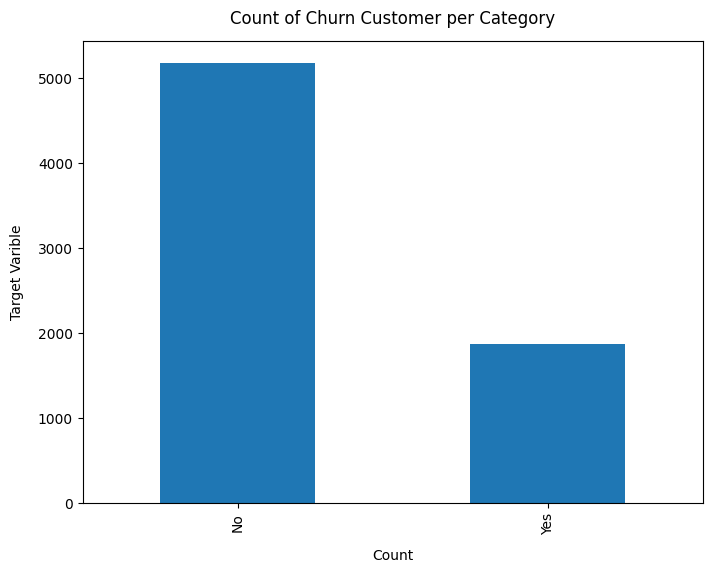

In [ ]:
df['Churn'].value_counts().plot(kind = 'bar', figsize=(8,6))
plt.xlabel("Count", labelpad =10)
plt.ylabel("Target Varible", labelpad =10)
plt.title("Count of Churn Customer per Category", y=1.02);

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


At first glance, there are no missing variables, although we must still convert 'TotalCharges' into a numerical type(float) and check again because it is a string type we wouldn't know if there were missing values.

'''
I can clone a GitHub repo in this Colab session and have access to the shell via ! operator. I can then
pull, commit, and push changes to the repo. I can also do Linux commands such as creating a new folder
and moving files around.
'''